<a href="https://colab.research.google.com/github/Annettteee/Data/blob/main/Annette_Copy_of_NSDC_Data_Science_Projects_Animal_Health_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 align="center">
    NSDC Data Science Projects
</h1>
  
<h2 align="center">
    Project: Animal Health - Data Project
</h2>

<h3 align="center">
    Name: (Annette)
</h3>


### **Please read before you begin your project**

**Instructions: Google Colab Notebooks:**

Google Colab is a free cloud service. It is a hosted Jupyter notebook service that requires no setup to use, while providing free access to computing resources. We will be using Google Colab for this project.

Certain parts of this project will be completed individually, while other parts are encouraged to be completed with the rest of your team. In order to work within the Google Colab Notebook, **please start by clicking on "File" and then "Save a copy in Drive."** This will save a copy of the notebook in your personal Google Drive. Each member of your team should work on their personal copy.

Please rename the file to "Animal Health - Your Full Name." Once this project is completed, you will be prompted to share your file with the National Student Data Corps (NSDC) Project Leaders.

You can now start working on the project. :)

We'll be using Google Colab for this assignment. This is a Python Notebook environment built by Google that's free for everyone and comes with a nice UI out of the box. For a comprehensive guide, see Colab's official guide [here](https://colab.research.google.com/github/prites18/NoteNote/blob/master/Welcome_To_Colaboratory.ipynb).

Colab QuickStart:
- Notebooks are made up of cells, cells can be either text or code cells. Click the +code or +text button at the top to create a new cell
- Text cells use a format called [Markdown](https://www.markdownguide.org/getting-started/). Cheatsheet is available [here](https://www.markdownguide.org/cheat-sheet/)
- Python code is run/executed in code cells. You can click the play button at the top left of a code block (sometimes hidden in the square brackets) to run the code in that cell. You an also hit shift+enter to run the cell that is currently selected. There is no concurrency since cells run one at a time but you can queue up multiple cells
- Each cell will run code individually but memory is shared across a notebook Runtime. You can think of a Runtime as a code session where everything you create and execute is temporarily stored. This means variables and functions are available between cells if you execute one cell before the other (physical ordering of cells does not matter). This also means that if you delete or change the name of something and re-execute the cell, the old data might still exist in the background. If things aren't making sense, you can always click Runtime -> restart runtime to start over.
- Runtimes will persist for a short period of time so you are safe if you lose connection or refresh the page but Google will shutdown a runtime after enough time has past. Everything that was printed out will remain on the page even if the runtime is disconnected
- Google's Runtimes come preinstalled with all the core python libraries (math, rand, time, etc) as well as common data analysis libraries (numpy, pandas, scikitlearn, matplotlib). Simply run `import numpy as np` in a code cell to make it available

**About the Project**

The Animal Health project will focus on the conservation of wildlife, with a mission to protect, restore, and enhance natural ecosystems. This initiative will aim to develop a predictive model that will identify whether an animal's condition is dangerous and if it is at risk of dying, drawing upon five distinct symptoms. The dataset for this project, sourced from Kaggle, will feature a diverse array of species ranging from birds to mammals, each characterized by symptoms such as fever, coughing, weight loss, pain, and more.

A Random Forest Classifier will be implemented to classify whether an animal is in danger. The dataset will undergo thorough data cleaning to refine it for model training. To address the challenge of an unbalanced dataset, the Random Over Sampling method will be employed to achieve balance. Exploratory data analysis will uncover significant insights into the danger levels of the animals, which will inform decision-making for animal welfare and contribute to bio-heritage conservation.

In addition to the Random Forest model, other machine learning models will be implemented to enhance predictive accuracy. By improving the understanding and management of animal health, this project will contribute to maintaining wildlife populations and promoting biodiversity.

## Milestone 1: Importing Libraries and Dataset

**Goal:** The aim is to import the necessary libraries and load the animal health dataset into the environment. This step is crucial as it sets up the foundational tools and data for the project.

**Step 1:** Import Libraries



In [1]:
#TODO: Import Libraries
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import string
from difflib import SequenceMatcher
from textblob import TextBlob

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings("ignore")

**Step 2:** Import Dataset from Kaggle

Dataset URL: https://www.kaggle.com/datasets/gracehephzibahm/animal-disease

In [2]:
##TODO:install kaggle
!pip install -q kaggle

In [3]:
# Import and upload your files below:
from google.colab import files
files.upload()

Saving data.csv to data.csv


{'data.csv': b'AnimalName,symptoms1,symptoms2,symptoms3,symptoms4,symptoms5,Dangerous\r\nDog,Fever,Diarrhea,Vomiting,Weight loss,Dehydration,Yes\r\nDog,Fever,Diarrhea,Coughing,Tiredness,Pains,Yes\r\nDog,Fever,Diarrhea,Coughing,Vomiting,Anorexia,Yes\r\nDog,Fever,Difficulty breathing,Coughing,Lethargy,Sneezing,Yes\r\nDog,Fever,Diarrhea,Coughing,Lethargy,Blue Eye,Yes\r\nDog,Fever,Respiratory distress,Seizuers,Hyperesthesia,Sudden death,Yes\r\nDog,Ulcers,Diarrhea,Poor Appetite,Tarry Stool,Enlarged lymph nodes,Yes\r\nDog,Facial Swelling,Bloody Drool,Foul Breath,Unable To Eat,Lossened Teeth,Yes\r\nDog,Fever,Difficulty breathing,Thrist and urination,Weight loss,Enlarged lymph nodes or Swelling,Yes\r\nDog,Swelling on leg,Painfull,Nasal Discharge,Broken Bones,Nasal Discharge,Yes\r\nDog,Short term lethargy,Loss of  appetite,Weekness in the back legs,Rapid Heart Rate,Week pulse,Yes\r\nDog,Swollen lymph nodes,Difficulty walking,Back Pain,Lethargy,Vaginal Discharge,Yes\r\nDog,Fever,Diarrhea,Abdomin

In [5]:
#TODO: create a kaggle folder
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [6]:
#TODO: copy kaggle.json file to folder created
! cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [7]:
#TODO: permission for json to act
!chmod 600 ~/.kaggle/kaggle.json

chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [8]:
#to list all datasets in kaggle
! kaggle datasets list

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.11/dist-packages/kaggle/__init__.py", line 7, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.11/dist-packages/kaggle/api/kaggle_api_extended.py", line 407, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method. See setup instructions at https://github.com/Kaggle/kaggle-api/


In [9]:
!kaggle datasets download -d gracehephzibahm/animal-disease

Dataset URL: https://www.kaggle.com/datasets/gracehephzibahm/animal-disease
License(s): Community Data License Agreement - Sharing - Version 1.0
  0% 0.00/11.7k [00:00<?, ?B/s]
100% 11.7k/11.7k [00:00<00:00, 25.1MB/s]


In [10]:
!unzip animal-disease.zip

Archive:  animal-disease.zip
replace data.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: data.csv                


## Milestone 2: Exploratory Data Analysis (EDA)

**Goal:** The focus of this milestone is to analyze the dataset to uncover patterns, relationships, and trends within the data. This analysis helps inform the model-building process.

**Step 1:** Read the data and print the data

In [11]:
#TODO: Read the csv and print them
data = pd.read_csv("/content/data.csv")

In [12]:
#TODO: Understand the type of data we are using
type(data)

pandas.core.frame.DataFrame

In [13]:
#TODO: Review the shape of the data
data.shape

(871, 7)

In [14]:
#TODO: Review the column names within the dataset
data.columns

Index(['AnimalName', 'symptoms1', 'symptoms2', 'symptoms3', 'symptoms4',
       'symptoms5', 'Dangerous'],
      dtype='object')

**Step 2:** Use the head function to view the top 5 rows of your data.

In [15]:
#TODO: Fill in below using the head function
data.head()

,AnimalName,symptoms1,symptoms2,symptoms3,symptoms4,symptoms5,Dangerous
0,Dog,Fever,Diarrhea,Vomiting,Weight loss,Dehydration,Yes
1,Dog,Fever,Diarrhea,Coughing,Tiredness,Pains,Yes
2,Dog,Fever,Diarrhea,Coughing,Vomiting,Anorexia,Yes
3,Dog,Fever,Difficulty breathing,Coughing,Lethargy,Sneezing,Yes
4,Dog,Fever,Diarrhea,Coughing,Lethargy,Blue Eye,Yes


**Step 3:** Use the tail function to view the bottom 5 rows of your data.

In [16]:
#TODO: Fill in below using the tail function
data.tail()

,AnimalName,symptoms1,symptoms2,symptoms3,symptoms4,symptoms5,Dangerous
866,Buffaloes,Fever,Difficulty breathing,Poor Appetite,Eye and Skin change,Unable to exercise,Yes
867,Buffaloes,Fever,Loss of appetite,Lession on the skin,Lethargy,Joint Pain,Yes
868,Buffaloes,Lesions in the nasal cavity,Lesions on nose,Vomiting,Noisy Breathing,Lesions on nose,Yes
869,Buffaloes,Hair loss,Dandruff,Vomiting,Crusting of the skin,Ulcerated skin,Yes
870,Buffaloes,Greenish-yellow nasal discharge,Lack of pigmentation,Vomiting,Lethargy,Pain on face,Yes


In [17]:
#TODO: Run the dtypes function
data.dtypes

,0
AnimalName,object
symptoms1,object
symptoms2,object
symptoms3,object
symptoms4,object
symptoms5,object
Dangerous,object


**Step 4:** Use the info function to view the information of your data.

In [18]:
#TODO: Fill in below using the info function
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 871 entries, 0 to 870
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   AnimalName  871 non-null    object
 1   symptoms1   871 non-null    object
 2   symptoms2   871 non-null    object
 3   symptoms3   871 non-null    object
 4   symptoms4   871 non-null    object
 5   symptoms5   871 non-null    object
 6   Dangerous   869 non-null    object
dtypes: object(7)
memory usage: 47.8+ KB


## Milestone 3: Data Cleaning and Preprocessing

**Goal:** The objective here is to clean the dataset, handle missing or erroneous data, and prepare it for analysis and modeling. Effective preprocessing improves model performance and reliability.

[Read this article](https://www.knowledgehut.com/blog/data-science/data-cleaning#conclusion-%C2%A0) to learn more about the process!


There are two rows with null value in the dangerous column


In [19]:
data[data['Dangerous'].isna()]

,AnimalName,symptoms1,symptoms2,symptoms3,symptoms4,symptoms5,Dangerous
269,Sheep,Teeth griding,Apathy,Dehydration,Ruminal stasis,Watery faeces,NaN
695,Buffaloes,Teeth griding,Apathy,Dehydration,Ruminal stasis,Watery faeces,NaN


**Step 1:** Check each column to see if there are any other NULL values

In [20]:
data[(data['symptoms1'] == 'Teeth griding')]

,AnimalName,symptoms1,symptoms2,symptoms3,symptoms4,symptoms5,Dangerous
269,Sheep,Teeth griding,Apathy,Dehydration,Ruminal stasis,Watery faeces,NaN
695,Buffaloes,Teeth griding,Apathy,Dehydration,Ruminal stasis,Watery faeces,NaN


In [21]:
data[(data['symptoms2'] == 'Apathy') ]


,AnimalName,symptoms1,symptoms2,symptoms3,symptoms4,symptoms5,Dangerous
269,Sheep,Teeth griding,Apathy,Dehydration,Ruminal stasis,Watery faeces,NaN
695,Buffaloes,Teeth griding,Apathy,Dehydration,Ruminal stasis,Watery faeces,NaN


In [22]:
data[(data['symptoms3'] == 'Dehydration')]

,AnimalName,symptoms1,symptoms2,symptoms3,symptoms4,symptoms5,Dangerous
267,Sheep,Fever,Wasting,Dehydration,Deability,Weakness,Yes
269,Sheep,Teeth griding,Apathy,Dehydration,Ruminal stasis,Watery faeces,NaN
292,Sheep,Poor immune function,Achomotrica,Dehydration,Death,Pains,Yes
314,Sheep,Inability to digest,Diarrhea,Dehydration,Weight loss,Anemia,Yes
693,Buffaloes,Fever,Wasting,Dehydration,Deability,Weakness,Yes
695,Buffaloes,Teeth griding,Apathy,Dehydration,Ruminal stasis,Watery faeces,NaN
718,Pig,Poor immune function,Achomotrica,Dehydration,Death,Pains,Yes
740,Pig,Inability to digest,Diarrhea,Dehydration,Weight loss,Anemia,Yes


In [23]:
data[(data['symptoms4'] == 'Ruminal stasis')]


,AnimalName,symptoms1,symptoms2,symptoms3,symptoms4,symptoms5,Dangerous
269,Sheep,Teeth griding,Apathy,Dehydration,Ruminal stasis,Watery faeces,NaN
695,Buffaloes,Teeth griding,Apathy,Dehydration,Ruminal stasis,Watery faeces,NaN


In [24]:
data[(data['symptoms5'] == 'Watery faeces')]


,AnimalName,symptoms1,symptoms2,symptoms3,symptoms4,symptoms5,Dangerous
269,Sheep,Teeth griding,Apathy,Dehydration,Ruminal stasis,Watery faeces,NaN
695,Buffaloes,Teeth griding,Apathy,Dehydration,Ruminal stasis,Watery faeces,NaN


**Step 2:** Columns like teeth grinding, apathy, ruminal stasis and watery feces do not have enough data, so we'll drop those for simplicity.

In [25]:
#TODO: Drop the columns with missing values for simplicity
data.dropna(inplace = True, axis = 0)


In [26]:
#TODO: Let's look at the data's shape again
data.shape

(869, 7)

**Step 3:** Handle the Animal Names - use the unique function to count different types of animals

In [27]:
#TODO: Use the unique function on the animal names
data["AnimalName"].unique()

array(['Dog', 'cat', 'Rabbit', 'cow', 'chicken', 'cattle', 'mammal',
       'Cattle', 'Horse', 'Turtle', 'Hamster', 'Lion', 'Fox', 'Fox ',
       'Goat', 'Deer', 'Chicken', 'Monkey', 'Birds', 'Sheep', 'Pigs',
       'Fowl', 'Duck', 'Other Birds', 'snake', 'horse', 'duck', 'donkey',
       'Donkey', 'mules', 'Elephant', 'Elk', 'Wapiti', 'Mule deer',
       'Black-tailed deer', 'Sika deer', 'White-tailed deer', 'Reindeer',
       'Moos', 'Tiger', 'Goats', 'Buffaloes', 'Dogs', 'Wolves', 'Hyaenas',
       'Pig'], dtype=object)

In [28]:
#TODO: Count each type of animal name
data['AnimalName'].value_counts()


,count
AnimalName,
Buffaloes,128
Sheep,109
Pig,63
Fowl,62
Elephant,59
Duck,56
Deer,38
Donkey,38
Birds,37


**Step 4:** Modify the repeated names and convert them to lower case and uniform the names of animals. For example, "goats" to "goat" and "moos" to "cow."

In [29]:
AnimalName = list(data['AnimalName'].unique())
AnimalName.sort()
AnimalName

['Birds',
 'Black-tailed deer',
 'Buffaloes',
 'Cattle',
 'Chicken',
 'Deer',
 'Dog',
 'Dogs',
 'Donkey',
 'Duck',
 'Elephant',
 'Elk',
 'Fowl',
 'Fox',
 'Fox ',
 'Goat',
 'Goats',
 'Hamster',
 'Horse',
 'Hyaenas',
 'Lion',
 'Monkey',
 'Moos',
 'Mule deer',
 'Other Birds',
 'Pig',
 'Pigs',
 'Rabbit',
 'Reindeer',
 'Sheep',
 'Sika deer',
 'Tiger',
 'Turtle',
 'Wapiti',
 'White-tailed deer',
 'Wolves',
 'cat',
 'cattle',
 'chicken',
 'cow',
 'donkey',
 'duck',
 'horse',
 'mammal',
 'mules',
 'snake']

In [30]:
print(data.columns)

Index(['AnimalName', 'symptoms1', 'symptoms2', 'symptoms3', 'symptoms4',
       'symptoms5', 'Dangerous'],
      dtype='object')


In [31]:
#TODO: Replace animal names, as needed, to create a more uniform list of animals
data['AnimalName'].replace({
    'black-tailed deer': 'deer',
    'white-tailed deer': 'deer',
    'mule deer': 'deer',
    'sika deer': 'deer',
    'other birds': 'bird',
    'dogs': 'dog',
    'fox ': 'fox',
    'goats': 'goat',
    'moos': 'cow',
    'birds': 'bird',
    'chicken': 'hen',
    'fowl': 'bird',
    'buffaloes': 'buffalo',
    'hyaenas': 'hyaena',
    'pigs': 'pig',
    'wolves': 'wolf',
    'mules': 'mule'
}, inplace=True)


In [32]:
#TODO: Make the animal names lower case and sort
AnimalName = list(data['AnimalName'].unique())
AnimalName.sort()
AnimalName

['Birds',
 'Black-tailed deer',
 'Buffaloes',
 'Cattle',
 'Chicken',
 'Deer',
 'Dog',
 'Dogs',
 'Donkey',
 'Duck',
 'Elephant',
 'Elk',
 'Fowl',
 'Fox',
 'Fox ',
 'Goat',
 'Goats',
 'Hamster',
 'Horse',
 'Hyaenas',
 'Lion',
 'Monkey',
 'Moos',
 'Mule deer',
 'Other Birds',
 'Pig',
 'Pigs',
 'Rabbit',
 'Reindeer',
 'Sheep',
 'Sika deer',
 'Tiger',
 'Turtle',
 'Wapiti',
 'White-tailed deer',
 'Wolves',
 'cat',
 'cattle',
 'cow',
 'donkey',
 'duck',
 'hen',
 'horse',
 'mammal',
 'mule',
 'snake']

In [33]:
data['Dangerous'].unique()

array(['Yes', 'No'], dtype=object)

**Step 5:** Handle the Repetitive Symptoms and convert it to lower case



In [34]:
cols = list(data.columns)
for col in cols:
    data[col] = data[col].str.lower()

In [35]:
s1 = set(data["symptoms1"].unique())
s2 = set(data["symptoms2"].unique())
s3 = set(data["symptoms3"].unique())
s4 = set(data["symptoms4"].unique())
s5 = set(data["symptoms5"].unique())

# Checking the total number of unique symptoms
s_total = (s1).union(s2).union(s3).union(s4).union(s5)
len(s_total)

876

**Step 6:** Remove Unwanted Spaces

In [36]:
characters_unique = set()
cols = list(data.columns)
for col in cols:
    for value in data[col]:
        for letter in value:
            characters_unique.add(letter)

list(data)

['AnimalName',
 'symptoms1',
 'symptoms2',
 'symptoms3',
 'symptoms4',
 'symptoms5',
 'Dangerous']

**Step 7:** Remove the special characters

In [37]:
temp = []
for ele in characters_unique:
    if ele not in string.ascii_lowercase:
        temp.append(ele)
temp

['(', ',', '_', '\xa0', '.', '-', ' ', ')']

In [38]:
# TODO: Creating a cleaning function
def clean(char):
    unwanted_chars = string.punctuation + string.digits + " "
    for extra in unwanted_chars:
        char = char.replace(extra, ' ')
    # Unwanted characters are being changed to space

    list_char = char.split()
    final_char = ""
    for ele in list_char:
        ele = ele.strip()

        flag = True
        for letter in ele:
            if letter not in string.ascii_lowercase:
                flag = False

        if flag:
            final_char += ele + " "

    return final_char.strip()

In [39]:
# TODO: Perform cleaning function on all columns
cols = list(data.columns)
for col in cols:
    data[col] = data[col].apply(clean)

In [40]:
# TODO: Recheck unique count
s1 = set(data["symptoms1"].unique())
s2 = set(data["symptoms2"].unique())
s3 = set(data["symptoms3"].unique())
s4 = set(data["symptoms4"].unique())
s5 = set(data["symptoms5"].unique())

# TODO: Checking the total number of unique symptoms
s_total =(s1).union(s2).union(s3).union(s4).union(s5) #look at Step 5 for a hint!
len(s_total)


862

In [41]:
# TODO: Renaming the columns
data.rename(columns={'AnimalName': 'Animal',
                   'symptoms1': 'Symptom 1',
                   'symptoms2': 'Symptom 2',
                   'symptoms3': 'Symptom 3',
                   'symptoms4': 'Symptom 4',
                   'symptoms5': 'Symptom 5'}, inplace=True)

**Step 8:** Handle Spelling Errors and count spelling errors

In [42]:
def similar(a, b):
    return SequenceMatcher(None, a, b).ratio()

# Testing
similar("Apple","Appel")

0.8

In [43]:
# TODO: Testing with actual value in the dataframe
similar('abdminal pain', 'abdominal pain')

0.9629629629629629

In [44]:
def change(data, ws, new):
    symps = [1,2,3]
    for col in symps:
        for w in ws:
            data.iloc[:, col] = data.iloc[:, col].replace(w, new)
    return data

In [45]:
# TODO: Structuring the words and the output
s_total = list(s_total)

similarity_scores = []
for i1, word1 in enumerate(s_total):
    for i2, word2 in enumerate(s_total[i1+1:]):
        ratio = similar(word1, word2)
        if ratio > 0.75: # Keep 0.75 as threshold
            value = [ratio, (word1, word2)]
            similarity_scores.append(value)

similarity_scores.sort(key=lambda val: val[0], reverse = True)
len(similarity_scores)
print(similarity_scores)
# There are many spelling mistakes

[[0.9787234042553191, ('difficulty in breathing', 'difficultty in breathing')], [0.975609756097561, ('high body temperaure', 'high body temperature')], [0.975609756097561, ('difficult in walking', 'difficulty in walking')], [0.9743589743589743, ('diffculty breathing', 'difficulty breathing')], [0.9743589743589743, ('difficulty breating', 'difficulty breathing')], [0.972972972972973, ('discharge from eye', 'discharge from eyes')], [0.9714285714285714, ('skin color change', 'skin colour change')], [0.9714285714285714, ('anversion to light', 'aversion to light')], [0.9714285714285714, ('decrease appetite', 'decreased appetite')], [0.9696969696969697, ('ocular discharge', 'occular discharge')], [0.9696969696969697, ('loss of appettite', 'loss of appetite')], [0.967741935483871, ('fluffed feather', 'fluffed feathers')], [0.9629629629629629, ('abdominal pain', 'abdminal pain')], [0.9565217391304348, ('skin rashes', 'skin reashes')], [0.9565217391304348, ('inappetence', 'inappentence')], [0.9

In [46]:
# Let us do some of the next steps for you! Fill in the blanks to create "new" words that account for all of the mispellings. Review an example or two below.

data = change(data = data, ws = ['difficultty in breathing', 'difficulty in breathing',
                           'difficulty breating', 'difficulty breathing',
                           'diffculty breathing', 'difficulty breathing',
                           'labored breathing', 'lound breathing',
                           'respiratory noise', 'respiratory distress',
                          'gasping for breath', 'gasping for air'], new = 'breathing difficulty')
data = change(data = data, ws = ['difficulty in walking', 'difficult in walking',
                           'limp', 'lip', 'inability to stand',
                           'difficulty in walk', 'difficulty walking', 'walking problem',
                           'lameness', 'legness'], new = 'walking difficulty')
data = change(data = data, ws = ['high body temperaure', 'high body temperature'], new = 'high body temperature')
data = change(data = data, ws = ['discharge from eye', 'discharge from eyes'], new = 'ocular discharge')
data = change(data = data, ws = ['decreased appetite', 'decrease appetite', 'poor appetite',
                           'loss of eat', 'loss of appettite', 'loss of appetite', 'reduced appetite',
                           'loss od appetite', 'loss of appetite', 'unable to eat',
                           'loss of appetite', 'lack of appetite'], new = 'decreased appetite')
data = change(data = data, ws = ['skin color change', 'skin colour change'], new = 'skin colour change')
data = change(data = data, ws = ['aversion to light', 'anversion to light'], new = 'aversion to light')
data = change(data = data, ws = ['ocular discharge', 'occular discharge',
                           'eye discharges', 'eye disharge',
                           'discharge from eyes', 'mucus discharge from the eye'], new = 'ocular discharge')
data = change(data = data, ws = ['fluffed feather', 'fluffed feathers'], new = 'fluffed feathers')
data = change(data = data, ws = ['abdominal pain', 'abdminal pain',
                           'abdonormal discomfort', 'abdominal discomfort',
                           'abdonormal pain', 'abdominal pain'], new = 'abdominal pain')
data = change(data = data, ws = ['inappetence', 'inappentence'], new = 'inappetence')
data = change(data = data, ws = ['skin reashes', 'skin rashes'], new = 'skin rashes')
data = change(data = data, ws = ['nosebleeds', 'nose bleeds',
                           'nose bleeds', 'nosebleed'], new = 'nose bleeds')
data = change(data = data, ws = ['despression', 'depression'], new = 'depression')
data = change(data = data, ws = ['weightloss', 'weight loss'], new = 'weight loss')
data = change(data = data, ws = ['watery eyes', 'watery eye'], new = 'watery eyes')
data = change(data = data, ws = ['diffulty swallowing', 'difficulty swallowing'], new = 'difficulty swallowing')
data = change(data = data, ws = ['swelling of joints', 'swelling on joints'], new = 'swelling of joints')
data = change(data = data, ws = ['vomitting', 'vomiting'], new = 'vomit')
data = change(data = data, ws = ['dizzines', 'dizziness'], new = 'dizziness')
data = change(data = data, ws = ['dullness', 'dull ness'], new = 'dullness')
data = change(data = data, ws = ['diarrhea', 'diarrhoea'], new = 'diarrhoea')
data = change(data = data, ws = ['head ache', 'headache',
                           'head tossing', 'head pressing'], new = 'headaches')
data = change(data = data, ws = ['pneumonia', 'pnemonia'], new = 'pneumonia')
data = change(data = data, ws = ['bloody diarrhea', 'bloody diarhhea'], new = 'bloody diarrhoea')
data = change(data = data, ws = ['watery eyes', 'watery eye'], new = 'watery eyes')
data = change(data = data, ws = ['diffulty swallowing', 'difficulty swallowing',
                           'difficulty in swallowing', 'difficulty swallowing'], new = 'difficulty swallowing')
data = change(data = data, ws = ['abnormalities', 'abnormalalities'], new = 'abnormalities')
data = change(data = data, ws = ['blood in faces', 'blood on faces',
                           'blood stool', 'blood in stool'], new = 'bloody faces')
data = change(data = data, ws = ['tremor', 'tremors'], new = 'tremor')
data = change(data = data, ws = ['anemia', 'aneamia',
                          'anemia', 'anaemia'], new = 'anemia')
data = change(data = data, ws = ['hyperesthesia', 'hyperaestesia'], new = 'hyperesthesia')
data = change(data = data, ws = ['attack', 'attacks'], new = 'attack')
data = change(data = data, ws = ['lesion', 'lesions',
                          'lession on the skin', 'lession on cat skin'], new = 'lesion')
data = change(data = data, ws = ['excess salivation', 'excession salivation',
                           'excessive grooming', 'excessive drooling',
                           'excess salivation', 'excess salivary'], new = 'excess salivation')
data = change(data = data, ws = ['muscles ache', 'muscle aches'], new = 'muscle ache')
data = change(data = data, ws = ['nausea', 'nause'], new = 'nausea')
data = change(data = data, ws = ['edema', 'oedema'], new = 'edema')
data = change(data = data, ws = ['ulcers', 'ulcer'], new = 'ulcer')
data = change(data = data, ws = ['sweat', 'sweats',
                           'sweating'], new = 'sweat')
data = change(data = data, ws = ['grinding teeth', 'grinding of teeth'], new = 'grinding of teeth')
data = change(data = data, ws = ['scratching', 'scartching'], new = 'scratching')
data = change(data = data, ws = ['join pains', 'joint pain'], new = 'joint pain')
data = change(data = data, ws = ['salivating', 'salivation'], new = 'salivation')
data = change(data = data, ws = ['week pulse', 'weak pulse'], new = 'weak pulse')

In [47]:
# Similarity score >= 0.8 and <0.9
data = change(data = data, ws = ['oains', 'pain',
                           'pain', 'pains'], new = 'pain')
data = change(data = data, ws = ['shaking oh head', 'shaking head',
                            'head shking', 'head shaking'], new = 'head shaking')
data = change(data = data, ws = ['scratches', 'scartches'], new = 'scratching')
data = change(data = data, ws = ['muscle stiffness', 'muscular stiffness'], new = 'muscle stiffness')
data = change(data = data, ws = ['ruffled feathers', 'fluffed feathers',
                           'puffed up feather', 'ruffled feathers'], new = 'fluffed feathers')
data = change(data = data, ws = ['seizuers', 'seizures'], new = 'seizures')
data = change(data = data, ws = ['lathargy'], new = 'lethargy')
data = change(data = data, ws = ['weekness', 'weakness'], new = 'weakness')
data = change(data = data, ws = ['bleeding wounds', 'bleeding from wounds'], new = 'bleeding from wounds')
data = change(data = data, ws = ['gasc', 'gas'], new = 'gas')
data = change(data = data, ws = ['high temperature', 'high body temperature'], new = 'high temperature')
data = change(data = data, ws = ['fatigue', 'fatique'], new = 'fatigue')
data = change(data = data, ws = ['distress', 'stress'], new = 'stress')
data = change(data = data, ws = ['poor coat condition', 'poor condition',
                           'poor condition', 'poor body condition',
                           'poor coat condition', 'poor body condition'], new = 'poor body condition')
data = change(data = data, ws = ['relunctance to move', 'reluctant move'], new = 'reluctant move')
data = change(data = data, ws = ['bloody urine', 'blood in urine'], new = 'bloody urine')
data = change(data = data, ws = ['change in gait', 'changed gait'], new = 'change in gait')
data = change(data = data, ws = ['drop in milk production', 'decrease in milk production'], new = 'decrease in milk production')
data = change(data = data, ws = ['thivk skin', 'thicked skin'], new = 'thick skin')
data = change(data = data, ws = ['tear produce', 'tear production'], new = 'tear production')
data = change(data = data, ws = ['rapid heartbeats', 'rapid heart rate'], new = 'rapid heartbeats')
data = change(data = data, ws = ['flock moratality', 'kid moratality'], new = 'flock moratality')
data = change(data = data, ws = ['skin irritation', 'irritation'], new = 'skin irritation')
data = change(data = data, ws = ['itchiness', 'itches', 'itching'], new = 'itching')
data = change(data = data, ws = ['listless', 'listlessness'], new = 'listless')
data = change(data = data, ws = ['drooping wings', 'droopy wings'], new = 'droopy wings')
data = change(data = data, ws = ['tachypea', 'trachea'], new = 'trachea')
data = change(data = data, ws = ['hot joints', 'hock joint'], new = 'hot joints')
data = change(data = data, ws = ['cough', 'coughing'], new = 'cough')
data = change(data = data, ws = ['swelling on thebody'], new = 'swelling on the body')

**Step 9:** Now try and view the top 5 rows of your dataset

In [48]:
#Use the head function below
data.head()

,Animal,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5,Dangerous
0,dog,fever,diarrhoea,vomit,weight loss,dehydration,yes
1,dog,fever,diarrhoea,cough,tiredness,pains,yes
2,dog,fever,diarrhoea,cough,vomiting,anorexia,yes
3,dog,fever,breathing difficulty,cough,lethargy,sneezing,yes
4,dog,fever,diarrhoea,cough,lethargy,blue eye,yes


**Step 10:** Recheck the unique count

In [49]:
# TODO: Rechecking unique count
s1 = set(data["Symptom 1"].unique())
s2 =set(data["Symptom 2"].unique())
s4 =set(data["Symptom 4"].unique())
s5 =set(data["Symptom 5"].unique())
# Checking the total number of unique symptoms
s_total = s1.union(s2).union(s3).union(s4).union(s5)
len(s_total)

823

## Milestone 4: Addressing Imbalanced Dataset

**Goal:** Implement techniques such as Random Over Sampling to address the issue of dataset imbalance. A balanced dataset leads to more robust model performance.

**Step 1:** Install Imbalanced-Learn

In [50]:
! pip install -U imbalanced-learn

**Step 2**: Drop the dangerous column and visualise the data

In [51]:
#Use data.drop to drop the dangerous column
X = data.drop(['Dangerous'], axis = 1)
Y = data['Dangerous']

In [52]:
Y.value_counts()

,count
Dangerous,
yes,849
no,20


<Axes: ylabel='count'>

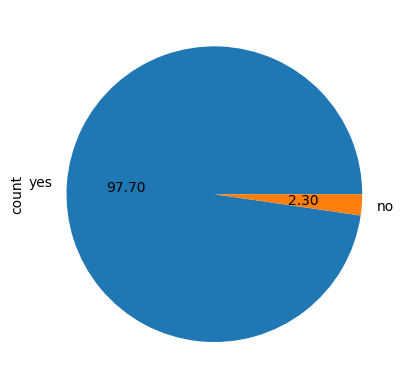

In [53]:
#show pie chart
Y.value_counts().plot.pie(autopct= '%.2f')

**Step 3**: Import and apply RandomOverSampler

New to RandomOverSampler and Imbalanced-Learn? Read this Medium article - https://lerekoqholosha9.medium.com/random-oversampling-and-undersampling-for-imbalanced-classification-a4aad406fd72

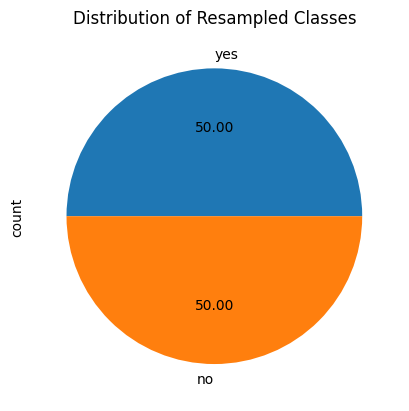

In [54]:
#TODO: Import RandomOverSampler and fit
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(sampling_strategy = "not majority")#string
X_res , Y_res = ros.fit_resample(X,Y)

ax = Y_res.value_counts().plot.pie(autopct= '%.2f')
_ = ax.set_title("Distribution of Resampled Classes")



**Step 4**: Look at the input features and print data

In [55]:
label_encoder = LabelEncoder()

# Apply LabelEncoder to 'Dangerous' column
data['Dangerous'] = label_encoder.fit_transform(data['Dangerous'])

print(data)

        Animal                        Symptom 1             Symptom 2  \
0          dog                            fever             diarrhoea   
1          dog                            fever             diarrhoea   
2          dog                            fever             diarrhoea   
3          dog                            fever  breathing difficulty   
4          dog                            fever             diarrhoea   
..         ...                              ...                   ...   
866  buffaloes                            fever  breathing difficulty   
867  buffaloes                            fever    decreased appetite   
868  buffaloes      lesions in the nasal cavity       lesions on nose   
869  buffaloes                        hair loss              dandruff   
870  buffaloes  greenish yellow nasal discharge  lack of pigmentation   

              Symptom 3             Symptom 4           Symptom 5  Dangerous  
0                 vomit           weight los

In [56]:
data

,Animal,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5,Dangerous
0,dog,fever,diarrhoea,vomit,weight loss,dehydration,1
1,dog,fever,diarrhoea,cough,tiredness,pains,1
2,dog,fever,diarrhoea,cough,vomiting,anorexia,1
3,dog,fever,breathing difficulty,cough,lethargy,sneezing,1
4,dog,fever,diarrhoea,cough,lethargy,blue eye,1
...,...,...,...,...,...,...,...
866,buffaloes,fever,breathing difficulty,decreased appetite,eye and skin change,unable to exercise,1
867,buffaloes,fever,decreased appetite,lesion,lethargy,joint pain,1
868,buffaloes,lesions in the nasal cavity,lesions on nose,vomit,noisy breathing,lesions on nose,1
869,buffaloes,hair loss,dandruff,vomit,crusting of the skin,ulcerated skin,1


**Step 5:** Input and apply LabelEncoder. Need a refresher on LabelEncoder in Python? Check out this resource: https://www.youtube.com/watch?v=YvEx0IGKTko

In [57]:
#TODO: Import and apply Label Encoder
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
data['enc-Symptom 1'] = LE.fit_transform(data['Symptom 1'])
data['enc-Symptom 2'] = LE.fit_transform(data['Symptom 2'])
data['enc-Symptom 3'] = LE.fit_transform(data['Symptom 3'])
data['enc-Symptom 4'] = LE.fit_transform(data['Symptom 4'])
data['enc-Symptom 5'] = LE.fit_transform(data['Symptom 5'])
data['enc-Dangerous'] = LE.fit_transform(data['Dangerous'])
X=data[['enc-Symptom 1', 'enc-Symptom 2', 'enc-Symptom 3', 'enc-Symptom 4', 'enc-Symptom 5']]
Y=data['enc-Dangerous']
X.shape
Y.shape
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size = 0.2)
X_train.shape, Y_train.shape
X_test.shape, Y_test.shape
clf = RandomForestClassifier()
clf.fit(X_train, Y_train)
X.iloc[0]
print(clf.predict([[68,36,193,193,31]]))
print(clf.predict_proba([[68,36,193,193,31]]))
print(clf.predict(X_test))
print(clf.predict_proba([[68,36,193,193,31]]))
print(clf.predict(X_test))
print(Y_test)
print(clf.score(X_test, Y_test))

[1]
[[0. 1.]]
[1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[[0. 1.]]
[1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
638    1
763    1
617    0
40     1
399    1
      ..
389    1
560    1
830    1
260    1
226    1
Name: enc-Dangerous, Length: 174, dtype: int64
0.9885057471264368


LabelEncoder is a tool from the Scikit-learn library in Python that transforms categorical labels (like 'red', 'green', and 'blue') into numerical values, making it easier for machine learning algorithms to process the data. It assigns a unique integer to each label, allowing algorithms to work with numbers rather than text. For example, it might convert 'red' to 0, 'green' to 1, and 'blue' to 2. This process helps in preparing data for analysis and modeling, especially when dealing with algorithms that require numerical inputs.

In [58]:
LE = LabelEncoder()

In [59]:
data['enc-Symptom 1'] = LE.fit_transform(data['Symptom 1'])
data['enc-Symptom 2'] = LE.fit_transform(data['Symptom 2'])
data['enc-Symptom 3'] = LE.fit_transform(data['Symptom 3'])
data['enc-Symptom 4'] = LE.fit_transform(data['Symptom 4'])
data['enc-Symptom 5'] = LE.fit_transform(data['Symptom 5'])
data['enc-Dangerous'] = LE.fit_transform(data['Dangerous'])

In [60]:
X=data[['enc-Symptom 1', 'enc-Symptom 2', 'enc-Symptom 3', 'enc-Symptom 4', 'enc-Symptom 5']]

In [61]:
Y=data['Dangerous']

In [62]:
#TODO: Review the shape
X.shape

(869, 5)

In [63]:
#TODO: Review the shape
Y.shape

(869,)

**Step 6:** Split the Dataset

In [64]:
#TODO: Split the dataset
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size = 0.2)

In [65]:
X_train.shape, X_test.shape

((695, 5), (174, 5))

In [66]:
Y_train.shape, Y_test.shape

((695,), (174,))

## Milestone 5: Model Training - Random Forest Classifier

**Goal:** Train a Random Forest Classifier to predict whether an animal is in danger based on the provided symptoms. This model serves as a primary classification tool for the project.

Check out the resource on Random Forest Classifier- https://www.youtube.com/watch?v=fWKM6x7RnAQ

**Step 1**: Fit the Random Forest Classifier with training data

In [67]:
clf = RandomForestClassifier()

In [68]:
#TODO: Fit randomforestclassifier
clf.fit(X_train,Y_train)

RandomForestClassifier()

**Step 2:** Perform prediction single sample from dataset

In [69]:
X.iloc[0]

,0
enc-Symptom 1,68
enc-Symptom 2,36
enc-Symptom 3,193
enc-Symptom 4,206
enc-Symptom 5,32


In [70]:
print(clf.predict([[68,36,193,193,31]]))

[1]


In [71]:
print(clf.predict_proba([[68,36,193,193,31]]))

[[0. 1.]]


**Step 3:** Perform prediction on the test dataset

These are PREDICTED CLASS LABELS

In [72]:
print(clf.predict(X_test))

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


These are ACTUAL CLASS LABELS

In [73]:
print(Y_test)

812    1
456    1
45     1
360    1
260    1
      ..
228    1
518    1
780    1
29     1
58     1
Name: Dangerous, Length: 174, dtype: int64


**Step 4:** Check model performance and accuracy

In [74]:
print(clf.score(X_test, Y_test))

1.0


## Milestone 6: Comparing Other Machine Learning Models

**Goal:** Compare additional machine learning models to the Random Forest to potentially improve predictive accuracy. This milestone focuses on exploring alternatives for enhanced performance.

**Step 1:** Train and Test Logistic Regression Model

Check out the resource on Logistic Regression from IBM - https://www.ibm.com/topics/logistic-regression

**Step 2:** Check Classification Report and Confusion Matrix

Want to learn about evaluating your Machine Learning Models. Check out - https://smuhabdullah.medium.com/confusion-matrices-and-classification-reports-a-guide-to-evaluating-machine-learning-models-385496cf7cee

In [75]:
# TODO: Importing necessary library
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
# Assuming data is already preprocessed and split
#X = df.drop('target_variable', axis=1)
#Y = df['target_variable']
#X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# TODO: Create a Logistic Regression Classifier
log_reg = LogisticRegression(random_state=42)

# TODO: Train the model
log_reg.fit(X_train, Y_train)

# TODO: Make predictions
Y_pred_log_reg = log_reg.predict(X_test)

# TODO: Print the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(Y_test, Y_pred_log_reg))

# TODO: Print the classification report
print("\nClassification Report:")
print(classification_report(Y_test, Y_pred_log_reg))

# TODO: Print the model accuracy
print("\nModel Accuracy:")
print(log_reg.score(X_test, Y_test))


Confusion Matrix:
[[  0   2]
 [  0 172]]

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.99      1.00      0.99       172

    accuracy                           0.99       174
   macro avg       0.49      0.50      0.50       174
weighted avg       0.98      0.99      0.98       174


Model Accuracy:
0.9885057471264368


**Step 3:** Train and Test Gradient Boosting Classifier Model

Check out this resource on Gradient Boosting Classifier - https://blog.paperspace.com/gradient-boosting-for-classification/

**Step 4:** Check Classification Report and Confusion Matrix

In [76]:
# Importing necessary library
from sklearn.ensemble import GradientBoostingClassifier

# Assuming data is already preprocessed and split
#X = df.drop('target_variable', axis=1)
#Y = df['target_variable']
#X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# TODO:Create a Gradient Boosting Classifier
gb_clf = GradientBoostingClassifier(n_estimators=100, random_state=42)

# TODO:Train the model
gb_clf.fit(X_train, Y_train)

# TODO:Make predictions
Y_pred_gb = gb_clf.predict(X_test)

# TODO:Print the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(Y_test, Y_pred_gb))

# TODO:Print the classification report
print("\nClassification Report:")
print(classification_report(Y_test, Y_pred_gb))

# TODO:Print the model accuracy
print("\nModel Accuracy:")
print(gb_clf.score(X_test, Y_test))


Confusion Matrix:
[[  2   0]
 [  0 172]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00       172

    accuracy                           1.00       174
   macro avg       1.00      1.00      1.00       174
weighted avg       1.00      1.00      1.00       174


Model Accuracy:
1.0


In [77]:
print(Y_train.dtype)
print(Y_train.unique())

int64
[1 0]


In [78]:
label_encoder = LabelEncoder()

# Apply LabelEncoder to 'Dangerous' column
data['Dangerous'] = label_encoder.fit_transform(data['Dangerous'])

print(data)

        Animal                        Symptom 1             Symptom 2  \
0          dog                            fever             diarrhoea   
1          dog                            fever             diarrhoea   
2          dog                            fever             diarrhoea   
3          dog                            fever  breathing difficulty   
4          dog                            fever             diarrhoea   
..         ...                              ...                   ...   
866  buffaloes                            fever  breathing difficulty   
867  buffaloes                            fever    decreased appetite   
868  buffaloes      lesions in the nasal cavity       lesions on nose   
869  buffaloes                        hair loss              dandruff   
870  buffaloes  greenish yellow nasal discharge  lack of pigmentation   

              Symptom 3             Symptom 4           Symptom 5  Dangerous  \
0                 vomit           weight lo

**Step 5:** Train and Test XGBoost Model

Check out this resource on XGBoost Model-

https://www.nvidia.com/en-us/glossary/xgboost/#:~:text=What%20is%20XGBoost%3F,%2C%20classification%2C%20and%20ranking%20problems.

**Step 6:** Check Classification Report and Confusion Matrix

In [79]:
# Importing necessary library
import xgboost as xgb
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Assuming data is already preprocessed and split
#X = df.drop('target_variable', axis=1)
#Y = df['target_variable']
#X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# TODO: Create an XGBoost Classifier
xgb_clf = xgb.XGBClassifier(n_estimators=100, random_state=42, use_label_encoder=False, eval_metric='mlogloss')

# TODO: Train the model
xgb_clf.fit(X_train, Y_train)

# TODO: Make predictions
Y_pred_xgb = xgb_clf.predict(X_test)

# TODO: Print the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(Y_test, Y_pred_xgb))

# TODO: Print the classification report
print("\nClassification Report:")
print(classification_report(Y_test, Y_pred_xgb))

# TODO: Print the model accuracy
print("\nModel Accuracy:")
print(xgb_clf.score(X_test, Y_test))


Confusion Matrix:
[[  2   0]
 [  0 172]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00       172

    accuracy                           1.00       174
   macro avg       1.00      1.00      1.00       174
weighted avg       1.00      1.00      1.00       174


Model Accuracy:
1.0


**Step 7:** Train and Test SVM Classifier

Check out this resource from IBM on SVM -
https://www.ibm.com/topics/support-vector-machine

**Step 8:** Check Prediction Probabilities, Test Prediction and Score

Want to learn how to calibre prediction scores? Check out this medium article - https://medium.com/walmartglobaltech/calibration-of-the-prediction-scores-how-does-it-help-f9ec79807e9

In [80]:
from sklearn.svm import SVC

# TODO: Create and train the model
svm_clf = SVC(probability=True, random_state=42)
svm_clf.fit(X_train,Y_train)

# TODO: Predictions
print("SVM Predictions:", svm_clf.predict([[68, 36, 193, 193, 31]]))
print("SVM Prediction Probabilities:", svm_clf.predict_proba([[68, 36, 193, 193, 31]]))
print("SVM Test Predictions:", svm_clf.predict(X_test))
print("SVM Score:", svm_clf.score(X_test, Y_test))


SVM Predictions: [1]
SVM Prediction Probabilities: [[0.02407411 0.97592589]]
SVM Test Predictions: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
SVM Score: 0.9885057471264368


**Step 9:** Train and Test KNN Classifier

Check out this resource from IBM on KNN - https://www.ibm.com/topics/knn

**Step 10:** Check Prediction Probabilities, Test Prediction and Score

In [81]:
from sklearn.neighbors import KNeighborsClassifier

# TODO: Create and train the model
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, Y_train)

# TODO: Predictions
print("KNN Predictions:", knn_clf.predict([[68, 36, 193, 193, 31]]))
print("KNN Prediction Probabilities:", knn_clf.predict_proba([[68, 36, 193, 193, 31]]))
print("___________:", knn_clf.predict(X_test))
print("__________:", knn_clf.score(X_test, Y_test))


KNN Predictions: [1]
KNN Prediction Probabilities: [[0. 1.]]
___________: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
__________: 0.9942528735632183


**Step 11:** Train and Test Decision Tree Classifier

Check out this resource from IBM on Decision Tree Classifier - https://ibm.com/topics/decision-trees

**Step 12:** Check Prediction Probabilities, Test Prediction and Score

In [82]:
from sklearn.tree import DecisionTreeClassifier

# TODO: Create and train the model
dt_clf = DecisionTreeClassifier(random_state=42)
dt_clf.fit(X_train, Y_train)

# TODO: Predictions
print("Predicted Class:", dt_clf.predict([[68, 36, 193, 193, 31]]))
print("Predicted possibilities:", dt_clf.predict_proba([[68, 36, 193, 193, 31]]))
print("Decision Tree Test Predictions:", dt_clf.predict(X_test))
print("Decision Tree Score:", dt_clf.score(X_test,Y_test))



Predicted Class: [1]
Predicted possibilities: [[0. 1.]]
Decision Tree Test Predictions: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Decision Tree Score: 0.9770114942528736


**Step 13:** Train and Test LightGBM Model

Check out this resource on LightGBM Model from geeksforgeeks - https://www.geeksforgeeks.org/lightgbm-light-gradient-boosting-machine/

**Step 14:** Check Prediction Probabilities, Test Prediction and Score

In [83]:
import lightgbm as lgb

# TODO: Create and train the model
lgb_clf = lgb.LGBMClassifier(n_estimators=100, random_state=42)
lgb_clf.fit(X_train, Y_train)

# TODO: Predictions
print("LightGBM Predictions:",lgb_clf.predict([[68, 36, 193, 193, 31]]))
print("LightGBM Prediction Probabilities:", lgb_clf.predict_proba([[68, 36, 193, 193, 31]]))
print("LightGBM Test Predictions:", lgb_clf.predict(X_test))
print("LightGBM Score:", lgb_clf.score(X_test, Y_test))


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 677, number of negative: 18
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000382 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 530
[LightGBM] [Info] Number of data points in the train set: 695, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.974101 -> initscore=3.627300
[LightGBM] [Info] Start training from score 3.627300
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

**Step 15**: Train and Test AdaBoostClassifier Model

Want to learn more about AdaBoost Classifier? Check out this article from datacamp - https://www.datacamp.com/tutorial/adaboost-classifier-python

**Step 16**: Check Prediction Probabilities, Test Prediction and Score

In [84]:
from sklearn.ensemble import AdaBoostClassifier

# TODO: Create and train the model
ada_clf = AdaBoostClassifier(n_estimators=100, random_state=42)
ada_clf.fit(X_train, Y_train)

# TODO: Predictions
print("AdaBoost Predictions:", ada_clf.predict([[68, 36, 193, 193, 31]]))
print("AdaBoost Prediction Probabilities:", ada_clf.predict_proba([[68, 36, 193, 193, 31]]))
print("AdaBoost Test Predictions:", ada_clf.predict(X_test))
print("AdaBoost Score:", ada_clf.score(X_test, Y_test))


AdaBoost Predictions: [1]
AdaBoost Prediction Probabilities: [[0.3329579 0.6670421]]
AdaBoost Test Predictions: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
AdaBoost Score: 0.9827586206896551


## Milestone 7: Model Evaluation

**Goal:** Evaluate the performance of the trained Random Forest model using metrics such as accuracy, precision, recall, and F1-score. Apply ROC - RECEIVER OPERATING CHARACTERISTIC CURVE. This step ensures that the model is effective in making predictions.

Want to learn more about ROC? Check out this youtube video- https://www.youtube.com/watch?v=z5qA9qZMyw0

In [85]:
!pip install catboost
!pip install xgboost
!pip install lightgbm

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 4.5 MB/s eta 0:00:00


Columns in DataFrame: Index(['AnimalName', 'symptoms1', 'symptoms2', 'symptoms3', 'symptoms4',
       'symptoms5', 'Dangerous'],
      dtype='object')
Random Forest - Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1 Score: 1.0000, ROC AUC: 1.0000
XGBoost - Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1 Score: 1.0000, ROC AUC: 1.0000
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000097 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 582
[LightGBM] [Info] Number of data points in the train set: 696, number of used features: 5
[LightGBM] [Info] Start training from score -3.654978
[LightGBM] [Info] Start training from score -0.029157
[LightGBM] [Info] Start training from score -5.852202
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive

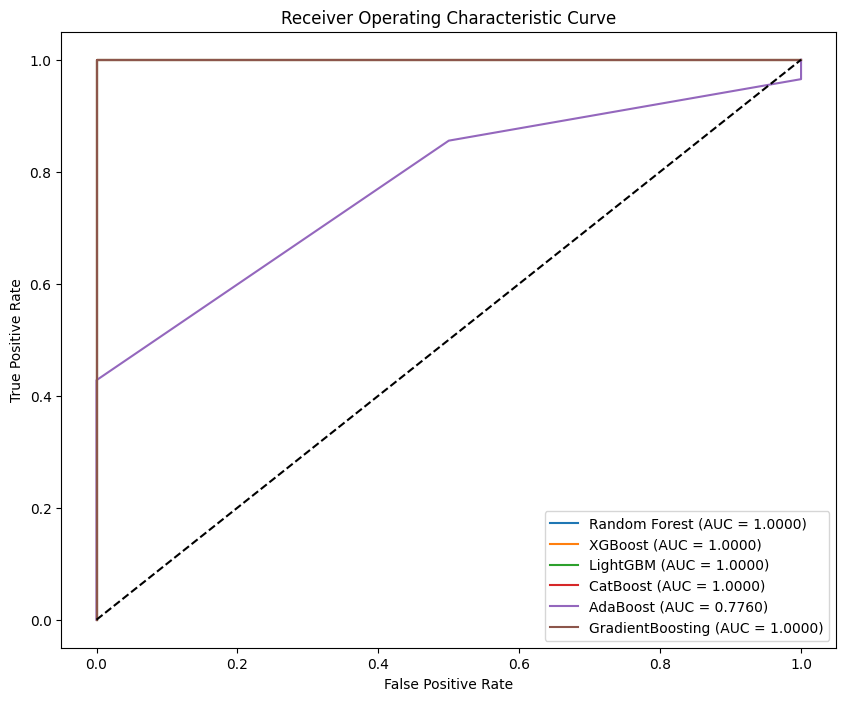

In [86]:
# TODO:Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
import xgboost as xgb
import lightgbm as lgb
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# TODO: Load your dataset
data = pd.read_csv('data.csv')

# TODO: Print the columns to verify
print("Columns in DataFrame:", data.columns)

# TODO: Replace 'symptoms1', 'symptoms2', etc., with actual column names if different
symptom_columns = ['symptoms1', 'symptoms2', 'symptoms3', 'symptoms4', 'symptoms5']
target_column = 'Dangerous'

# Check if the columns exist in the DataFrame
for col in symptom_columns + [target_column]:
    if col not in data.columns:
        raise KeyError(f"Column '{col}' not found in the dataset")

# TODO: Encoding categorical variables
LE = LabelEncoder()
for col in symptom_columns:
    data[f'enc-{col}'] = LE.fit_transform(data[col])
data[f'enc-{target_column}'] = LE.fit_transform(data[target_column])

# TODO: Preparing data
X = data[[f'enc-{col}' for col in symptom_columns]]
Y = data[f'enc-{target_column}']

# TODO: Splitting data into train and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# TODO: Function to evaluate model
def evaluate_model(model, X_test, Y_test, model_name):
    Y_pred = model.predict(X_test)
    Y_pred_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

    accuracy = accuracy_score(Y_test, Y_pred)
    precision = precision_score(Y_test, Y_pred)
    recall = recall_score(Y_test, Y_pred)
    f1 = f1_score(Y_test, Y_pred)
    roc_auc = roc_auc_score(Y_test, Y_pred_prob) if Y_pred_prob is not None else None

    print(f"{model_name} - Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}, ROC AUC: {roc_auc:.4f}")

    return Y_pred_prob

# TODO: Function to plot ROC curve
def plot_roc_curve(models, X_test, Y_test):
    plt.figure(figsize=(10, 8))
    for model, name in models:
        Y_pred_prob = evaluate_model(model, X_test, Y_test, name)
        if Y_pred_prob is not None:
            fpr, tpr, _ = roc_curve(Y_test, Y_pred_prob)
            plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc_score(Y_test, Y_pred_prob):.4f})')

    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic Curve')
    plt.legend()
    plt.show()

# TODO: Define models
models = [
    (RandomForestClassifier(random_state=42), "Random Forest"),
    (xgb.XGBClassifier(n_estimators=100, random_state=42, use_label_encoder=False, eval_metric='mlogloss'), "XGBoost"),
    (lgb.LGBMClassifier(n_estimators=100, random_state=42), "LightGBM"),
    (CatBoostClassifier(n_estimators=100, random_state=42, verbose=0), "CatBoost"),
    (AdaBoostClassifier(n_estimators=100, random_state=42), "AdaBoost"),
    (GradientBoostingClassifier(n_estimators=100, random_state=42), "GradientBoosting")
]

# TODO: Train and evaluate each model
for model, name in models:
    model.fit(X_train, Y_train)
    evaluate_model(model, X_test, Y_test, name)

# Plot ROC Curve for each model
plot_roc_curve(models, X_test, Y_test)


<h3 align = 'center' >
Thank you for completing the project!
</h3>

Please submit all materials to the NSDC HQ team at er3101@columbia.edu in order to receive a virtual certificate of completion. Do reach out to us if you have any questions or concerns. We are here to help you learn and grow.
